In [1]:
import pandas as pd
import os
from scipy.stats import spearmanr
import numpy as np
import argparse
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
result_dir_cp2 = [f"/home/qcx679/hantang/UAAG2/results/CP2_Full_mask_5_virtual_node_mask_token_atomic_only_mask_diffusion_absorb_state_0917_variational_sampling_1000_1126_{i}" for i in range(10)]
# result_dir_puma = [f"/home/qcx679/hantang/UAAG2/results/PUMA_Full_mask_5_virtual_node_mask_token_atomic_only_mask_diffusion_normalized_prior_0915_variational_sampling_1000_{i}" for i in range(10)]
result_folder = pd.DataFrame({"benchmark_name": [],
                              "model": [],
                              "spearmanr_pred": [],
                        })
model_name_list = [f"UNAAGI-{i}" for i in range(10)]
for model_num in range(len(model_name_list)):
    for benchmark_name in ['CP2', 'CP_NAA', 'CP_NCAA']:
        if benchmark_name == 'CP2':
            bm_path = result_dir_cp2[model_num]
            result_df = pd.read_csv(os.path.join(bm_path, "all_benchmark_results.csv"))
        # elif benchmark_name == 'PUMA':
        #     bm_path = result_dir_puma[model_num]
        #     result_df = pd.read_csv(os.path.join(bm_path, "all_benchmark_results.csv"))
        elif benchmark_name == 'CP_NCAA':
            bm_path = result_dir_cp2[model_num]
            result_df = pd.read_csv(os.path.join(bm_path, "uaa_benchmark_results.csv"))
        elif benchmark_name == 'CP_NAA':
            bm_path = result_dir_cp2[model_num]
            result_df = pd.read_csv(os.path.join(bm_path, "naa_benchmark_results.csv"))
        # elif benchmark_name == 'PUMA_NCAA':
        #     bm_path = result_dir_puma[model_num]
        #     result_df = pd.read_csv(os.path.join(bm_path, "uaa_benchmark_results.csv"))

        for model in ['UNAAGI']:
            spr = spearmanr(result_df['value'], result_df['pred']).correlation
            # ndcg = result_df[result_df['model'] == model]['ndcg_pred'].values[0]
            result_folder = pd.concat([result_folder, pd.DataFrame({"benchmark_name": [benchmark_name],
                                                                    "model": [f'UNAAGI-{model_num+1}'],
                                                                    "spearmanr_pred": [spr],
                                                            })], ignore_index=True)
        


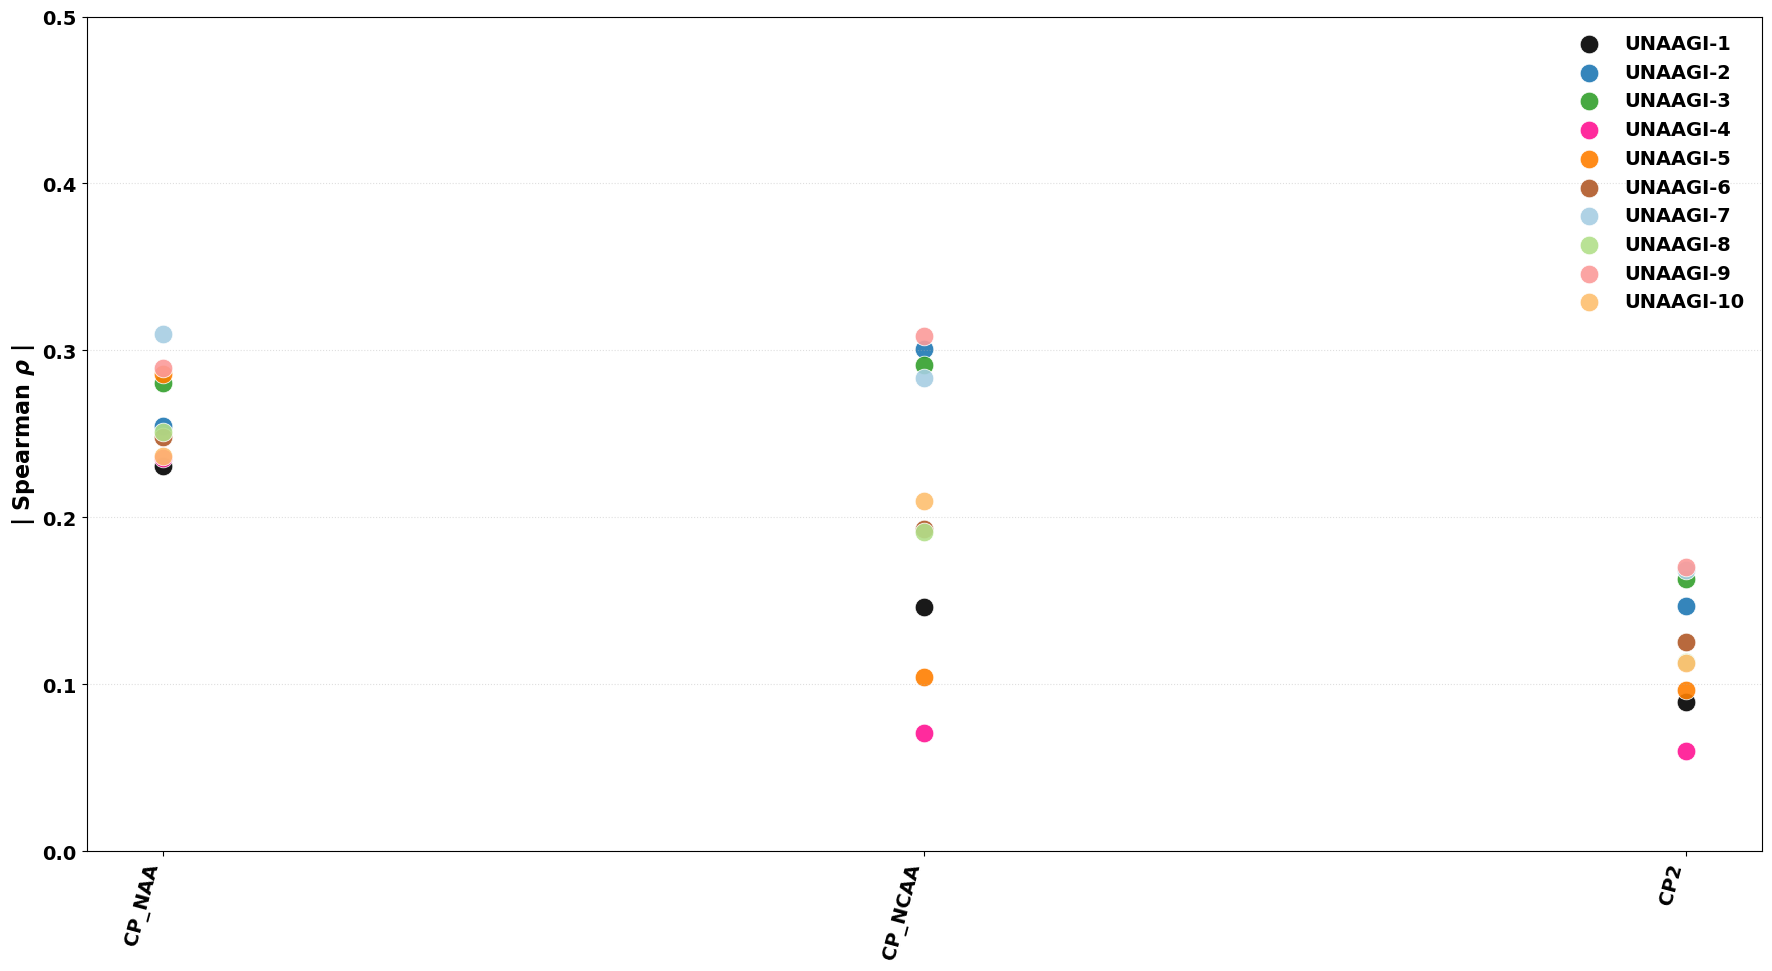

In [4]:

# --- 2) Choose which models to show (3 looks clean like your example) ---
# Put your preferred models here (order = legend order):
models_to_plot = [
    f"UNAAGI-{i}" for i in range(1, 10+1)
]
colors = {
    "UNAAGI-1": "black",     # black
    "UNAAGI-2": "#1f78b4",             # dark blue
    "UNAAGI-3": "#33a02c",                 # dark green
    "UNAAGI-4": "#ff1493",                  # bright red (highlight)
    "UNAAGI-5": "#ff7f00",          # orange
    "UNAAGI-6": "#b15928",          # brown
    "UNAAGI-7": "#a6cee3",          # light blue
    "UNAAGI-8": "#b2df8a",          # light green
    "UNAAGI-9": "#fb9a99",          # light red
    "UNAAGI-10": "#fdbf6f",         # light orange
    "Progen2_large": "#6a3d9a",           # purple
    "ESM-IF1": "#666666",
    "UNAAGI-1025": "#00CED1",          # dark turquoise
}


# --- 3) Build a pivot table (rows = benchmark, cols = model) ---
piv = result_folder.pivot_table(index="benchmark_name",
                     columns="model",
                     values="spearmanr_pred")

# Keep only selected models (drop any that are missing):
models_to_plot = [m for m in models_to_plot if m in piv.columns]
assert len(models_to_plot) > 0, "None of the chosen models are present in the data."

# --- 4) Sort benchmarks by the reference model (first in models_to_plot) descending ---
ref_model = models_to_plot[-1]
piv_sorted = piv.sort_values(by=ref_model, ascending=False)

benchmarks = piv_sorted.index.tolist()
x = np.arange(len(benchmarks))

# --- 5) Make the plot: aligned dots on the same x for each benchmark ---
plt.rcParams.update({
    "font.size": 16,       # larger text everywhere
    "font.weight": "bold", # bold text
    "axes.labelweight": "bold",
    "axes.titlesize": 15,  # even larger title
    "axes.titleweight": "bold",
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
})
plt.figure(figsize=(18, 10))

for m in models_to_plot:
    # if m == ref_model:
    #     y = piv_sorted[m].values
    #     plt.scatter(
    #         x, y, marker="*",
    #         s=220,
    #         alpha=0.9,
    #         label=m,
    #         edgecolor="black",
    #         linewidth=1.2,
    #         color=colors.get(m, None)  # fallback to Matplotlib default if not specified
    #     )
    # else:
    y = piv_sorted[m].values
    plt.scatter(
        x, y,
        s=180,
        alpha=0.9,
        label=m,
        edgecolor="white",
        linewidth=0.6,
        color=colors.get(m, None)  # fallback to Matplotlib default if not specified
    )

# --- 6) Cosmetics like the example ---
plt.xticks(x, benchmarks, rotation=75, ha="right")
plt.ylabel(r"| Spearman $\rho$ |")
plt.ylim(-0.00, 0.5)  # adjust if you like
plt.grid(axis="y", linestyle=":", alpha=0.4)
# put the legend outside
plt.legend(title="", frameon=False, loc="upper right")
plt.tight_layout()
# Save as high-resolution SVG
# plt.savefig("UNAAGI_proteingym_atomic.svg", format="svg", dpi=300)
plt.show()


In [5]:
result_dir_puma = [f"/home/qcx679/hantang/UAAG2/results/PUMA_Full_mask_5_virtual_node_mask_token_atomic_only_mask_diffusion_normalized_prior_0915_variational_sampling_1127_1000_{i}" for i in range(5)]
# result_dir_puma = [f"/home/qcx679/hantang/UAAG2/results/PUMA_Full_mask_5_virtual_node_mask_token_atomic_only_mask_diffusion_normalized_prior_0915_variational_sampling_1000_{i}" for i in range(10)]
result_folder = pd.DataFrame({"benchmark_name": [],
                              "model": [],
                              "spearmanr_pred": [],
                        })
model_name_list = [f"UNAAGI-{i}" for i in range(5)]
for model_num in range(len(model_name_list)):
    for benchmark_name in ['PUMA', 'PUMA_NAA', 'PUMA_NCAA']:
        
        if benchmark_name == 'PUMA':
            bm_path = result_dir_puma[model_num]
            result_df = pd.read_csv(os.path.join(bm_path, "all_benchmark_results.csv"))
        elif benchmark_name == 'PUMA_NCAA':
            bm_path = result_dir_puma[model_num]
            result_df = pd.read_csv(os.path.join(bm_path, "uaa_benchmark_results.csv"))
        elif benchmark_name == 'PUMA_NAA':
            bm_path = result_dir_puma[model_num]
            result_df = pd.read_csv(os.path.join(bm_path, "naa_benchmark_results.csv"))

        for model in ['UNAAGI']:
            spr = spearmanr(result_df['value'], result_df['pred']).correlation
            # ndcg = result_df[result_df['model'] == model]['ndcg_pred'].values[0]
            result_folder = pd.concat([result_folder, pd.DataFrame({"benchmark_name": [benchmark_name],
                                                                    "model": [f'UNAAGI-{model_num+1}'],
                                                                    "spearmanr_pred": [spr],
                                                            })], ignore_index=True)
        


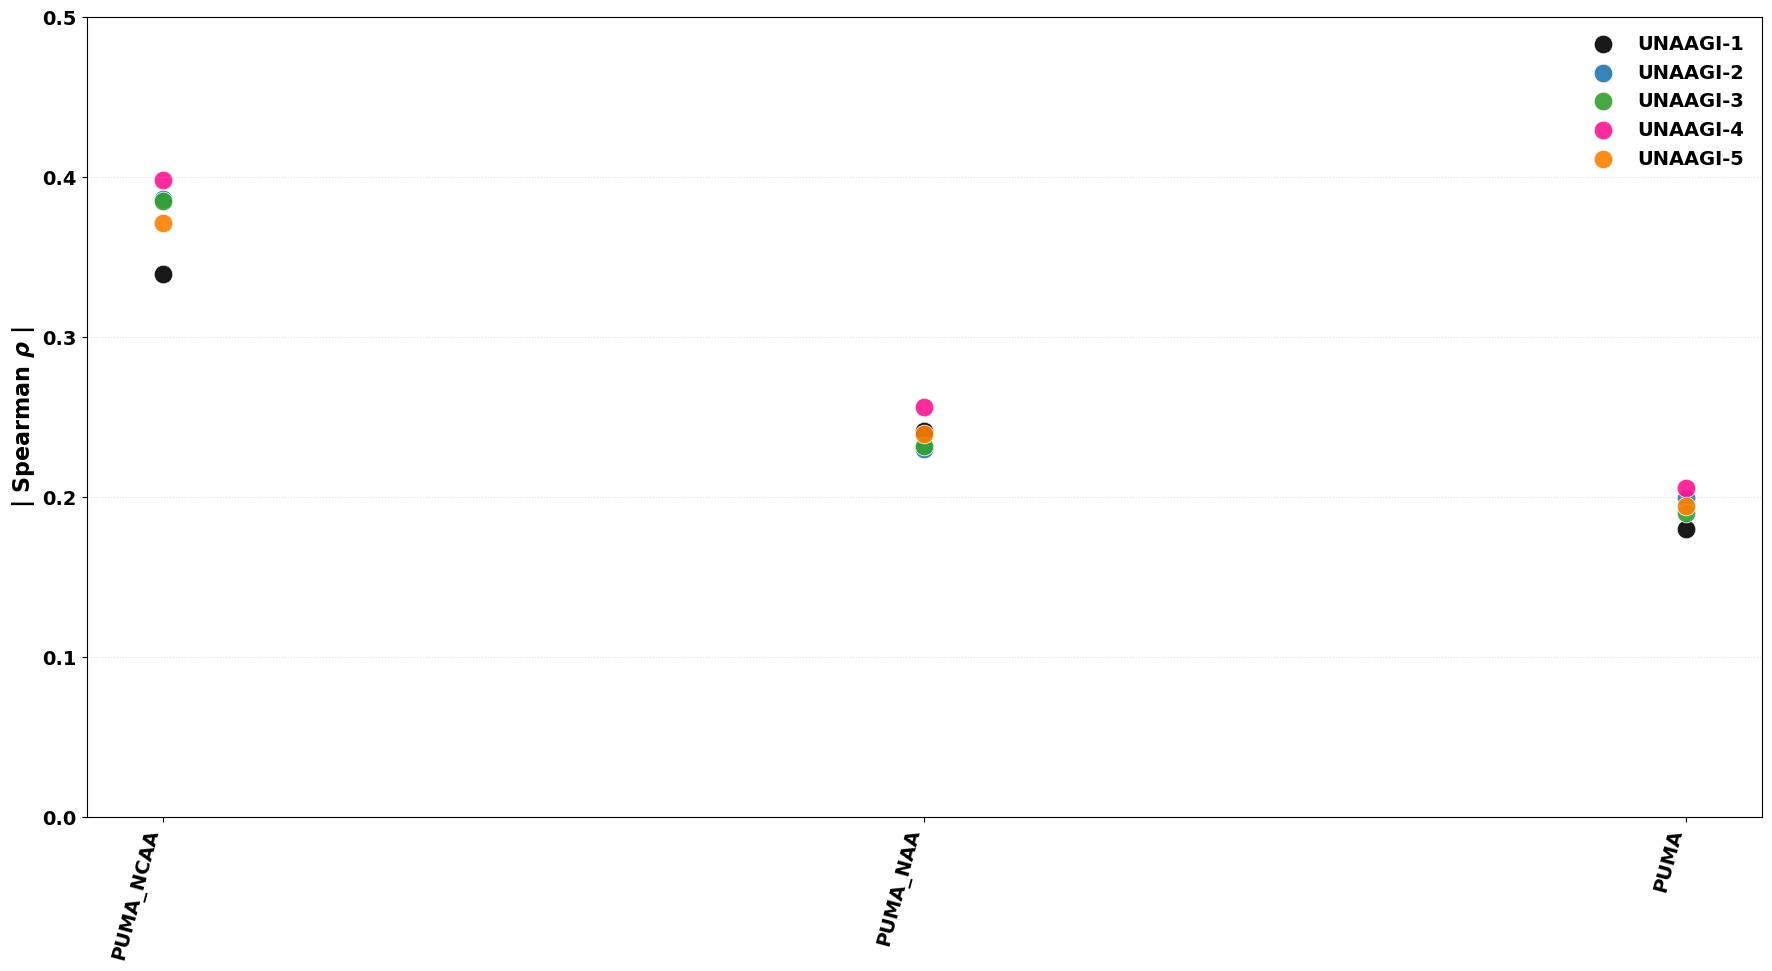

In [6]:

# --- 2) Choose which models to show (3 looks clean like your example) ---
# Put your preferred models here (order = legend order):
models_to_plot = [
    f"UNAAGI-{i}" for i in range(1, 5+1)
]
colors = {
    "UNAAGI-1": "black",     # black
    "UNAAGI-2": "#1f78b4",             # dark blue
    "UNAAGI-3": "#33a02c",                 # dark green
    "UNAAGI-4": "#ff1493",                  # bright red (highlight)
    "UNAAGI-5": "#ff7f00",          # orange
    "UNAAGI-6": "#b15928",          # brown
    "UNAAGI-7": "#a6cee3",          # light blue
    "UNAAGI-8": "#b2df8a",          # light green
    "UNAAGI-9": "#fb9a99",          # light red
    "UNAAGI-10": "#fdbf6f",         # light orange
    "Progen2_large": "#6a3d9a",           # purple
    "ESM-IF1": "#666666",
    "UNAAGI-1025": "#00CED1",          # dark turquoise
}


# --- 3) Build a pivot table (rows = benchmark, cols = model) ---
piv = result_folder.pivot_table(index="benchmark_name",
                     columns="model",
                     values="spearmanr_pred")

# Keep only selected models (drop any that are missing):
models_to_plot = [m for m in models_to_plot if m in piv.columns]
assert len(models_to_plot) > 0, "None of the chosen models are present in the data."

# --- 4) Sort benchmarks by the reference model (first in models_to_plot) descending ---
ref_model = models_to_plot[-1]
piv_sorted = piv.sort_values(by=ref_model, ascending=False)

benchmarks = piv_sorted.index.tolist()
x = np.arange(len(benchmarks))

# --- 5) Make the plot: aligned dots on the same x for each benchmark ---
plt.rcParams.update({
    "font.size": 16,       # larger text everywhere
    "font.weight": "bold", # bold text
    "axes.labelweight": "bold",
    "axes.titlesize": 15,  # even larger title
    "axes.titleweight": "bold",
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
})
plt.figure(figsize=(18, 10))

for m in models_to_plot:
    # if m == ref_model:
    #     y = piv_sorted[m].values
    #     plt.scatter(
    #         x, y, marker="*",
    #         s=220,
    #         alpha=0.9,
    #         label=m,
    #         edgecolor="black",
    #         linewidth=1.2,
    #         color=colors.get(m, None)  # fallback to Matplotlib default if not specified
    #     )
    # else:
    y = piv_sorted[m].values
    plt.scatter(
        x, y,
        s=180,
        alpha=0.9,
        label=m,
        edgecolor="white",
        linewidth=0.6,
        color=colors.get(m, None)  # fallback to Matplotlib default if not specified
    )

# --- 6) Cosmetics like the example ---
plt.xticks(x, benchmarks, rotation=75, ha="right")
plt.ylabel(r"| Spearman $\rho$ |")
plt.ylim(-0.00, 0.5)  # adjust if you like
plt.grid(axis="y", linestyle=":", alpha=0.4)
# put the legend outside
plt.legend(title="", frameon=False, loc="upper right")
plt.tight_layout()
# Save as high-resolution SVG
# plt.savefig("UNAAGI_proteingym_atomic.svg", format="svg", dpi=300)
plt.show()


In [ ]:
barplot_res = pd.DataFrame({"benchmark": ["CP2", "PUMA", "CP2", "PUMA", "CP2", "PUMA", "CP2"],
                            "model": ["UNAAGI", "UNAAGI", "PepINVENT", "PepINVENT", "NCFlow(AEV-PLIG)", "NCFlow(AEV-PLIG)", "NCFlow(ATM)"],
                            "spearmanr":[0.3307, 0.1968, -0.0339, 0.1554, 0.08, -0.19, -0.15]
})

barplot_res_uaa = pd.DataFrame({"benchmark": ["CP2", "PUMA", "CP2", "PUMA"],
                            "model": ["UNAAGI", "UNAAGI", "PepINVENT", "PepINVENT"],
                            "spearmanr":[0.5553, 0.1968, 0.09844094444303289, 0.16444158840417306]
})

In [7]:
# Calculate mean and std for CP2 (10 runs)
result_dir_cp2 = [f"/home/qcx679/hantang/UAAG2/results/CP2_Full_mask_5_virtual_node_mask_token_atomic_only_mask_diffusion_absorb_state_0917_variational_sampling_1000_1126_{i}" for i in range(10)]
cp2_spearmanr_list = []

for model_num in range(10):
    bm_path = result_dir_cp2[model_num]
    result_df = pd.read_csv(os.path.join(bm_path, "all_benchmark_results.csv"))
    spr = spearmanr(result_df['value'], result_df['pred']).correlation
    cp2_spearmanr_list.append(spr)

cp2_mean = np.mean(cp2_spearmanr_list)
cp2_std = np.std(cp2_spearmanr_list)

print(f"CP2 - Mean: {cp2_mean:.4f}, Std: {cp2_std:.4f}")
print(f"CP2 individual values: {cp2_spearmanr_list}")

# Calculate mean and std for PUMA (5 runs)
result_dir_puma = [f"/home/qcx679/hantang/UAAG2/results/PUMA_Full_mask_5_virtual_node_mask_token_atomic_only_mask_diffusion_normalized_prior_0915_variational_sampling_1127_1000_{i}" for i in range(5)]
puma_spearmanr_list = []

for model_num in range(5):
    bm_path = result_dir_puma[model_num]
    result_df = pd.read_csv(os.path.join(bm_path, "all_benchmark_results.csv"))
    spr = spearmanr(result_df['value'], result_df['pred']).correlation
    puma_spearmanr_list.append(spr)

puma_mean = np.mean(puma_spearmanr_list)
puma_std = np.std(puma_spearmanr_list)

print(f"PUMA - Mean: {puma_mean:.4f}, Std: {puma_std:.4f}")
print(f"PUMA individual values: {puma_spearmanr_list}")

CP2 - Mean: 0.1246, Std: 0.0354
CP2 individual values: [0.0891937370413725, 0.14692816461409275, 0.16287008995093283, 0.059813973921842, 0.09641059234740096, 0.1254401888183229, 0.16866602475963313, 0.11317261374217683, 0.17022371238750048, 0.11290302277613037]
PUMA - Mean: 0.1937, Std: 0.0087
PUMA individual values: [0.17958361390382266, 0.19912438498263327, 0.18985039923830577, 0.20543167920314168, 0.19426881480581307]


In [8]:
# Update barplot_res with mean and std values
barplot_res = pd.DataFrame({
    "benchmark": ["CP2", "PUMA", "CP2", "PUMA", "CP2", "PUMA", "CP2"],
    "model": ["UNAAGI", "UNAAGI", "PepINVENT", "PepINVENT", "NCFlow(AEV-PLIG)", "NCFlow(AEV-PLIG)", "NCFlow(ATM)"],
    "spearmanr": [cp2_mean, puma_mean, -0.0339, 0.1554, 0.08, -0.19, -0.15],
    "std": [cp2_std, puma_std, 0, 0, 0, 0, 0]  # Error bars only for UNAAGI
})

print("\nUpdated barplot_res:")
print(barplot_res)


Updated barplot_res:
  benchmark             model  spearmanr       std
0       CP2            UNAAGI   0.124562  0.035355
1      PUMA            UNAAGI   0.193652  0.008735
2       CP2         PepINVENT  -0.033900  0.000000
3      PUMA         PepINVENT   0.155400  0.000000
4       CP2  NCFlow(AEV-PLIG)   0.080000  0.000000
5      PUMA  NCFlow(AEV-PLIG)  -0.190000  0.000000
6       CP2       NCFlow(ATM)  -0.150000  0.000000


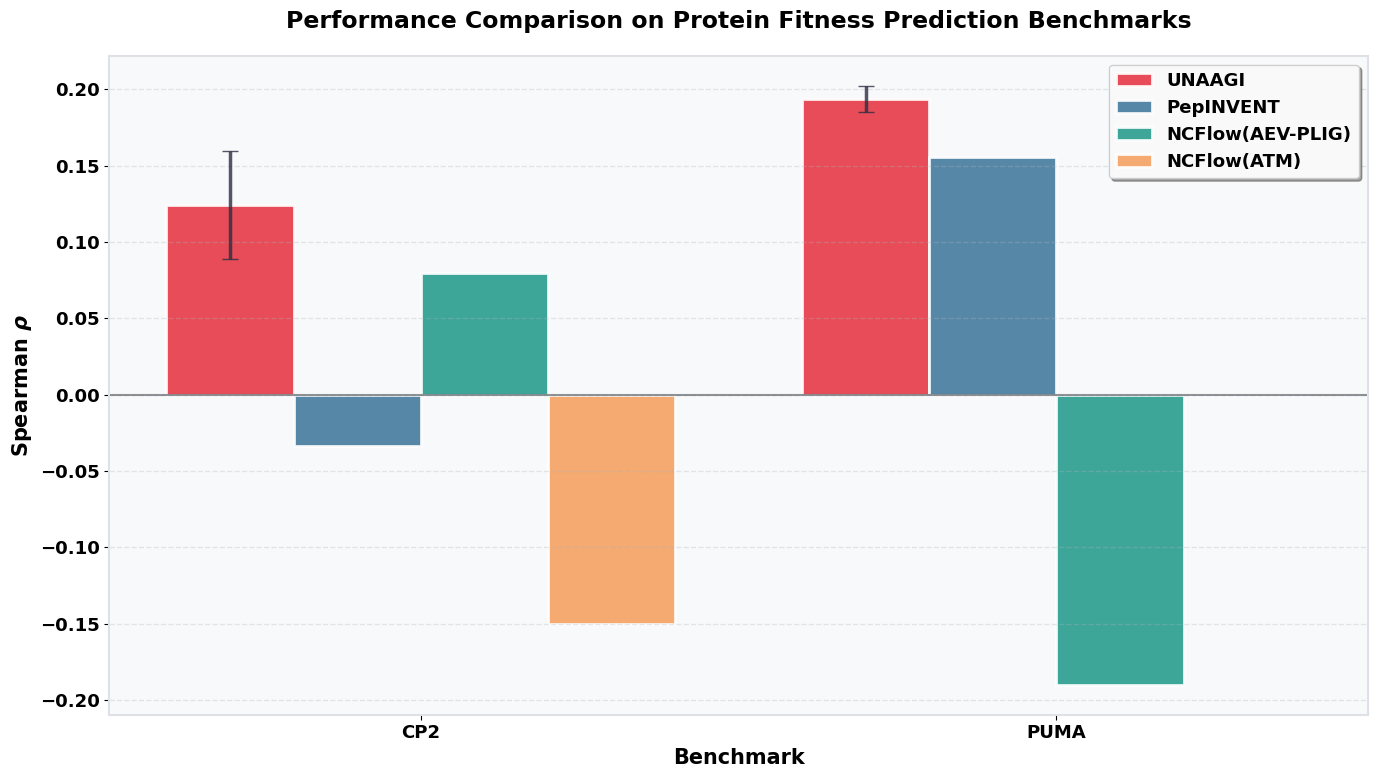

In [19]:
# Create bar plot with error bars
plt.rcParams.update({
    "font.size": 14,
    "font.weight": "bold",
    "axes.labelweight": "bold",
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "legend.fontsize": 13,
})

fig, ax = plt.subplots(figsize=(14, 8), facecolor='white')
ax.set_facecolor('#f8f9fa')

# Define beautiful colors for each model using a modern palette
model_colors = {
    "UNAAGI": "#E63946",           # Vibrant red (highlight - your main model)
    "PepINVENT": "#457B9D",        # Steel blue
    "NCFlow(AEV-PLIG)": "#2A9D8F", # Teal/turquoise
    "NCFlow(ATM)": "#F4A261"       # Warm orange
}

# Group by benchmark
benchmarks = barplot_res['benchmark'].unique()
x = np.arange(len(benchmarks))
width = 0.2  # width of bars

# Get unique models and their positions
models = barplot_res['model'].unique()
n_models = len(models)

for i, model in enumerate(models):
    model_data = barplot_res[barplot_res['model'] == model]
    
    # Get positions for this model's bars
    positions = x + (i - n_models/2 + 0.5) * width
    
    # Get values for each benchmark
    values = []
    errors = []
    for benchmark in benchmarks:
        row = model_data[model_data['benchmark'] == benchmark]
        if len(row) > 0:
            values.append(row['spearmanr'].values[0])
            errors.append(row['std'].values[0])
        else:
            values.append(0)
            errors.append(0)
    
    # Plot bars with error bars
    ax.bar(positions, values, width, 
           label=model, 
           color=model_colors.get(model, None),
           alpha=0.9,
           edgecolor='white',
           linewidth=2,
           yerr=errors if model == "UNAAGI" else None,
           capsize=6,
           error_kw={'linewidth': 2.5, 'ecolor': '#2b2d42', 'alpha': 0.8})

# Customize plot
ax.set_xlabel('Benchmark', fontweight='bold', fontsize=15)
ax.set_ylabel(r'Spearman $\rho$', fontweight='bold', fontsize=15)
ax.set_title('Performance Comparison on Protein Fitness Prediction Benchmarks', fontweight='bold', fontsize=17, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(benchmarks, fontsize=13)
ax.legend(frameon=True, loc='upper right', fancybox=True, shadow=True, framealpha=0.95)
ax.grid(axis='y', linestyle='--', alpha=0.3, color='#adb5bd', linewidth=1)
ax.axhline(y=0, color='#495057', linestyle='-', linewidth=1.5, alpha=0.6)

# Add subtle spines styling
for spine in ax.spines.values():
    spine.set_edgecolor('#dee2e6')
    spine.set_linewidth(1.5)

plt.tight_layout()
# Save as high-resolution SVG
plt.savefig('protein_fitness_benchmarks.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
# Calculate mean and std for CP_NCAA (10 runs)
result_dir_cp2 = [f"/home/qcx679/hantang/UAAG2/results/CP2_Full_mask_5_virtual_node_mask_token_atomic_only_mask_diffusion_absorb_state_0917_variational_sampling_1000_1126_{i}" for i in range(10)]
cp2_ncaa_spearmanr_list = []

for model_num in range(10):
    bm_path = result_dir_cp2[model_num]
    result_df = pd.read_csv(os.path.join(bm_path, "uaa_benchmark_results.csv"))
    spr = spearmanr(result_df['value'], result_df['pred']).correlation
    cp2_ncaa_spearmanr_list.append(spr)

cp2_ncaa_mean = np.mean(cp2_ncaa_spearmanr_list)
cp2_ncaa_std = np.std(cp2_ncaa_spearmanr_list)

print(f"CP2_NCAA - Mean: {cp2_ncaa_mean:.4f}, Std: {cp2_ncaa_std:.4f}")
print(f"CP2_NCAA individual values: {cp2_ncaa_spearmanr_list}")

# Calculate mean and std for PUMA_NCAA (5 runs)
result_dir_puma = [f"/home/qcx679/hantang/UAAG2/results/PUMA_Full_mask_5_virtual_node_mask_token_atomic_only_mask_diffusion_normalized_prior_0915_variational_sampling_1127_1000_{i}" for i in range(5)]
puma_ncaa_spearmanr_list = []

for model_num in range(5):
    bm_path = result_dir_puma[model_num]
    result_df = pd.read_csv(os.path.join(bm_path, "uaa_benchmark_results.csv"))
    spr = spearmanr(result_df['value'], result_df['pred']).correlation
    puma_ncaa_spearmanr_list.append(spr)

puma_ncaa_mean = np.mean(puma_ncaa_spearmanr_list)
puma_ncaa_std = np.std(puma_ncaa_spearmanr_list)

print(f"PUMA_NCAA - Mean: {puma_ncaa_mean:.4f}, Std: {puma_ncaa_std:.4f}")
print(f"PUMA_NCAA individual values: {puma_ncaa_spearmanr_list}")

CP2_NCAA - Mean: 0.2099, Std: 0.0807
CP2_NCAA individual values: [0.1461612532943847, 0.3008081975730459, 0.291372664959794, 0.07100295496671674, 0.10412661180749284, 0.19289790127425518, 0.28331558112502947, 0.19119226582740775, 0.30850442380520465, 0.20964616500232017]
PUMA_NCAA - Mean: 0.3756, Std: 0.0202
PUMA_NCAA individual values: [0.3389623387806773, 0.38577060858957557, 0.384870256456494, 0.3976626511734353, 0.37063713270304466]


In [11]:
# Update barplot_res_uaa with mean and std values
barplot_res_uaa = pd.DataFrame({
    "benchmark": ["CP2", "PUMA", "CP2", "PUMA"],
    "model": ["UNAAGI", "UNAAGI", "PepINVENT", "PepINVENT"],
    "spearmanr": [cp2_ncaa_mean, puma_ncaa_mean, 0.09844094444303289, 0.16444158840417306],
    "std": [cp2_ncaa_std, puma_ncaa_std, 0, 0]  # Error bars only for UNAAGI
})

print("\nUpdated barplot_res_uaa:")
print(barplot_res_uaa)


Updated barplot_res_uaa:
  benchmark      model  spearmanr       std
0       CP2     UNAAGI   0.209903  0.080745
1      PUMA     UNAAGI   0.375581  0.020214
2       CP2  PepINVENT   0.098441  0.000000
3      PUMA  PepINVENT   0.164442  0.000000


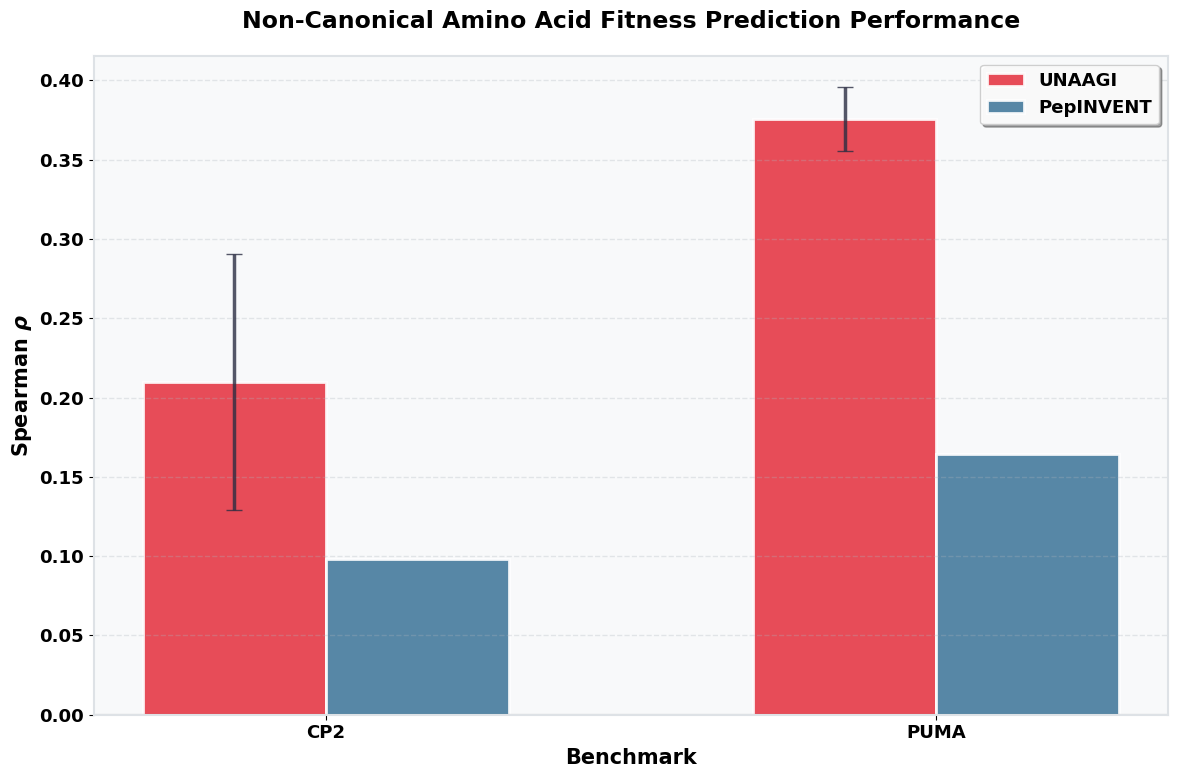

In [20]:
# Create bar plot with error bars for NCAA benchmarks
plt.rcParams.update({
    "font.size": 14,
    "font.weight": "bold",
    "axes.labelweight": "bold",
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "legend.fontsize": 13,
})

fig, ax = plt.subplots(figsize=(12, 8), facecolor='white')
ax.set_facecolor('#f8f9fa')

# Define beautiful colors for each model using a modern palette
model_colors_uaa = {
    "UNAAGI": "#E63946",           # Vibrant red (highlight - your main model)
    "PepINVENT": "#457B9D",        # Steel blue
}

# Group by benchmark
benchmarks_uaa = barplot_res_uaa['benchmark'].unique()
x_uaa = np.arange(len(benchmarks_uaa))
width_uaa = 0.3  # width of bars

# Get unique models and their positions
models_uaa = barplot_res_uaa['model'].unique()
n_models_uaa = len(models_uaa)

for i, model in enumerate(models_uaa):
    model_data = barplot_res_uaa[barplot_res_uaa['model'] == model]
    
    # Get positions for this model's bars
    positions = x_uaa + (i - n_models_uaa/2 + 0.5) * width_uaa
    
    # Get values for each benchmark
    values = []
    errors = []
    for benchmark in benchmarks_uaa:
        row = model_data[model_data['benchmark'] == benchmark]
        if len(row) > 0:
            values.append(row['spearmanr'].values[0])
            errors.append(row['std'].values[0])
        else:
            values.append(0)
            errors.append(0)
    
    # Plot bars with error bars
    ax.bar(positions, values, width_uaa, 
           label=model, 
           color=model_colors_uaa.get(model, None),
           alpha=0.9,
           edgecolor='white',
           linewidth=2,
           yerr=errors if model == "UNAAGI" else None,
           capsize=6,
           error_kw={'linewidth': 2.5, 'ecolor': '#2b2d42', 'alpha': 0.8})

# Customize plot
ax.set_xlabel('Benchmark', fontweight='bold', fontsize=15)
ax.set_ylabel(r'Spearman $\rho$', fontweight='bold', fontsize=15)
ax.set_title('Non-Canonical Amino Acid Fitness Prediction Performance', fontweight='bold', fontsize=17, pad=20)
ax.set_xticks(x_uaa)
ax.set_xticklabels(benchmarks_uaa, fontsize=13)
ax.legend(frameon=True, loc='upper right', fancybox=True, shadow=True, framealpha=0.95)
ax.grid(axis='y', linestyle='--', alpha=0.3, color='#adb5bd', linewidth=1)
ax.axhline(y=0, color='#495057', linestyle='-', linewidth=1.5, alpha=0.6)

# Add subtle spines styling
for spine in ax.spines.values():
    spine.set_edgecolor('#dee2e6')
    spine.set_linewidth(1.5)

plt.tight_layout()
# Save as high-resolution SVG
plt.savefig('ncaa_fitness_benchmarks.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()